# Steinberg, Dave. Vibration Analysis for Electronic Equipment, 2nd ed., 1988

Steve Embleton | 20161116 | Notes


In [208]:
%matplotlib inline

## Chapter 1, Introduction

Modes and vibrations basics. Designs for one input may fail when used in other areas with different forcing frequencies closer to the devices natural frequency. Air, water, and land have different frequency ranges of interest and shock considerations. Optimization needs to consider shock and vibration.  Not one or the other.

* Fasteners
    * Our group has no official specification, so I need to make my own.
    * Steinberg recommends slotted hex head screws
    * In through holes, locknuts should be used instead of lock washers.
* pg 13. "A good vibration isolator is often a poor shock isolator, and a good shock isolator is often a poor vibration isolator.  The proper design must be incorporated into the isolator to satisfy both the vibration and the shock requirements."
* Lee [5] recommends a maximum resonant frequency of 100 Hz and a max acceleration of 200G on electronic components.
* pg 15. "On tall narrow cabinets the load-carrying isolators should be at the base and stabilizing isolators should be at the top." Excessive deflection at the top can significantly affect the system modes.

## Chapter 2, Vibrations of Simple Electronic Equipment

Walks through: 
* Solving simple systems for naturl frequency given a displacement
* Effects of relationships between frequency/acceleration to displacements
* Damping at resonance as a function of spring rate and transmissibility
* Transmissibility of a system undergoing forced periodic motion
* Calculations for multiple mass-spring systems
* Need to be careful of the asusmptions within each section.  Most assume no or negligible damping.

In [209]:
## Equation (2.10), solving for the natural frequency of a mass-spring system given the static deflection.

def fn_dst(d_st):
    """Returns the natural frquency of a mass-spring system when given a static deflection in mm."""
    from math import pi
    
    g = 9.8*1000    #gravity [mm/s^2]
    
    fn = (1/(2*pi)) * (g / d_st)**0.5
    
    return(fn)    

In [210]:
fn_dst(1.19)

14.443075742745915

### Section 2.7, Relation of Frequency and Acceleration to Displacement
* Mass-Spring system, not a function of damping
* Assumes displacement can be represented by $Y = Y_0\sin(\Omega t)$
    * ${\dot Y} = \Omega Y_0 \cos(\Omega t)$ = Velocity
    * ${\ddot Y} = -\Omega^2 Y_0 \sin(\Omega t)$ = Acceleration
* Max acceleration at $\sin(\Omega t)=1$
    

In [211]:
## Similar to equation 2.30 except with gravity as an input so user can define units. Solving for Y_0

def Y_G_fn(G, f_n, g=9800):
    """Assumes a Mass-Spring System approximated as a single degree of freedom system, solution can be 
    taken in the form Y = Y_0 sin(Omega t).
    
    Input acceleration in units of Gravity (G) and the frequency (f_n).  Standard gravity (g) is equal to 9800 mm/s^2 and the
    result yields an answer in mm.  The input g can be changed to yield a result in the desired units."""
    from math import pi
    
    Y = g*G / (f_n*2*pi)**2
    
    return(Y)

In [212]:
print(Y_G_fn(7, 14.4))

8.379910780604229


### 2.9, Forced Vibrations with Viscous Damping

* Solving the response of a MSD system given a harmonic force acting on the mass.
    * Can I find a similar solution to this as a function of a harmonic deflection at the base of the spring and damper?
    * $m{\ddot Y} + c{\dot Y} + KY = P_0cos(\Omega t)$
    * This derivation is not detailed, Eqn 2.43


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: RuntimeWarning: divide by zero encountered in double_scalars


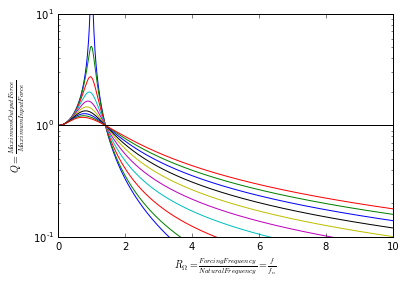

In [213]:
# Plotting Figure 2.17 using Eqn. 2.48.

import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from sympy import zeros

R_c = np.arange(0,1,.1)        # R_c = c/c_c. This is the ratio of the damping to the critical damping
R_Omega = np.arange(0,10,.01)   # R_Omega = Omega / Omega_n.  This is the ratio of the input frequency to the natural frequency.

# Initialize the transmissibility Q 
Q = zeros(len(R_c), len(R_Omega))

# Equation 2.48
def Q_Rc_RO(R_Omega, R_c):
    Q = sqrt((1 + (2 * R_Omega * R_c)**2)/((1 - R_Omega**2)**2 + (2 * R_Omega * R_c)**2))
    return(Q)

for i in range(len(R_c)):
    for j in range(len(R_Omega)):
        Q[i,j] = Q_Rc_RO(R_Omega[j], R_c[i])
        
# Plot Results
plt.semilogy(R_Omega,Q.T)
plt.xlabel('$R_\Omega = \\frac{Forcing Frequency}{Natural Frequency} = \\frac{f}{f_n}$')
plt.ylabel('$Q = \\frac{{Maximum Output Force}}{Maximum Input Force}$')
plt.axis([0,10,0.1,10])
plt.plot([0,10],[1,1],'k')
plt.show()
        

Damping occurs to the right of the amplification peak at $R_{\Omega} = \sqrt(2)$.

## Chapter 3, Lumped Masses for Electronic Assemblies
* Correctly selecting boundary conditions has a greater efect then mass placement, up to 50%, on finding the correct natural frequency.
* Simplifying a uniform mass to a point can reduce the natural frequency by 30%
* Includes an analysis of a two mass system using general equations of motion.
    * Does not detail the method for solving the equations that yeild Fig. 3.17.

## Chapter 4, Beam Structures for Electronic Subassemblies
* Calculates natural frequency, $f_n$, using representative equations for the deflection and boundary conditions of a beam.
* Beam natural frequency depends ont he ratio of $\frac{E}{\rho}$, Young's modulus over density.
* Estimating the natural frequency of non-uniform cross sections yeilds a $f_n$ lower then actual.
* Solves composites by translating the stiffness factor of the laminate into an equivalent base material thickness.  Only works when bending is parallel to the lamination.

## Chapter 6, Printed-Circuit Boards and Flat Plates
* Calculate thedeflection and stress in a circuit board as a function of boundary conditions and component location.
* Effect of ribs and rib orientation
    * For ribs to increase the stiffness of a system, they need to transfer the load to a support.  Ribs are most effective when oriented to align with supports.

## Chapter 7, Preventing Sinusoidal-Vibration Failures
* Most environmental failures in military systems are due to thermal expansion.

## Chapter 8, Understanding Random Vibration

* "If two major structural resonances occur close to one another, they may produce severe dynamic coupling effects that can porduce rapid fatigue failures."
* For a cyclically alternating electric current, RMS is equal to the value of the direct current that would produce the same average power dissipation in a resistive load.
* Failure conditions
    1. High acceleration levels
    2. High stress levels
    3. Large displacement amplitudes
    4. Electrical signals out of tolerance - N.A.
* 3$\sigma$ is often the limit used because it captures 99.7% of the accelerations and most labs have a 3$\sigma$ limit on their equipment.
* In the math libray, natural log is called with (`log`) and log base 10 with (`log10`)
* Multiple degree of freedom systems (8.29). $G_{out} = \sqrt{\sum{P_i \Delta f_i Q_i^2}}$
* From: Crandall, Random Vibration, 1958.  $P_{out} = Q^2 P$.  Book available [online](https://babel.hathitrust.org/cgi/pt?id=mdp.39015060919126;view=1up;seq=17).




In [214]:
## Calculating the Grms of a shaped random vibration input curve.
# Sec. 8.8, Eqns. 8.4 - 8.6.

def grms (freq, PSD):
    """Returns the Grms value for a shaped random vibration input curve.
    Input the frequency and PSD values as a list in the form grms(freq, PSD).
    The frequency and PSD list must have the same number of elements."""
    
    from math import log10, log
    
    A = 0
    
    if len(freq)!=len(PSD):
        print("Error: The number of elements in the Frequency and PSD lists do not match.")
    
    else:
        for i in range(1,len(freq)):
            
            # Calculate the slope
            dB = 10 * log10(PSD[i]/PSD[i-1])           # dB
            OCT = log10(freq[i]/freq[i-1])/log10(2)    # Octave
            S = dB/OCT                                 # Slope
            
            # Calculate the area in units of [G^2]
            if S == 0:
                A = A + PSD[i] * (freq[i] - freq[i-1])
            elif S == -3:
                A = A + -freq[i] * PSD[i] * log(freq[i-1] / freq[i])
            else:
                A = A + (3 * PSD[i]/(3 + S)) * (freq[i] - (freq[i-1]/freq[i])**(S/3) * freq[i-1])
            
            # Calculate the Grms [G]
            grms = A**(0.5)

    return(grms)


In [215]:
# Find the GRMS of the ASTM common carrier profile.  

Common_Carrier = [[1, 4, 100, 200], [.0001, .01, .01, .001]]

grms(Common_Carrier[0], Common_Carrier[1])

1.1469379669303117

In [216]:
## Response to a random vibration, from Section 8.
# Valid for a single resonance with a Q > 10.


def resp_psd_Q (P_in, Q, f_n, g=9800):
    """At a natural frequency, calculates the Grms and Zrms (relative motion) of the point given the transmissibility,
    and PSD.""" 
    from math import pi
    
    Grms = ((pi/2)*P_in*f_n*Q)**0.5    # RMS acceleration, Eqn. 8.61
    
    #g = 9.8*1000                       # Gravity, [mm/s^2]
    
    Zrms = Y_G_fn(Grms, f_n, g)      # Relative motion, Eqn. 8.62.  Ref. Eqn. 2.30
    
    return(Grms, Zrms)

In [217]:
resp_psd_Q (0.00072, 3.146, 30.4)

(0.3288836909042307, 0.08834083693899289)

## Chapter 9, Designing for Shock Environments
* Eqn. 9.40 - Damping ratio ~ $R_c = \frac{C}{C_c} = \frac{1}{2 Q}$
    * $Q = \frac{1}{2 R_c}$
* Figure 9.17 illustrates the difficulty in designing for both shock and vibration.  Shock isolation occurs to the left of the amplification peak while vibration isoliation occurs on the right. Equation for calculating amplification missing for graphs in Chp. 9. 
* Velocity shocks, used when modeling drop tests.
    * Assuming single DOF M-S-D, the dork done on the spring is equal to the kinetic energy of the mass. $\frac{1}{2} K Y^2 = \frac{1}{2} M V^2$
    * Max accelertaion: $G_{max} = \frac{a}{g} = \frac{V}{g} \sqrt(\frac{K}{M}) = \frac{V}{g} \Omega$, or $G = \frac{\Delta V \Omega}{g}$.
* Can not recreate Fig. 9.21 without a relationship between the amplification and the frequency ratio.
    * Impact damping only occurs at $R = \frac{frequency_{response}}{frequency_{source}} <= 0.5$
    * Danger area from $0.5 <= R <= 2$
    * This assumes an damping ratio of $R_c = 0.1$ and $Q = 5$
    * These equations do not relate to velocity shocks in which the forcing frequncy is determined by the natural frequency.  
* For velocity shocks max expected G can be calculated or if the response is known, the natural freuqncy should fall out as function of the repsonse G and the height.

In [218]:
# Calculate the velocity before impact during drop tests
def vf_H (H, g=9800):
    '''Solves for the velocity before impact of an object dropped from a height H.
    Assumes a standard gravity of 9800 mm/s. Input the gravity in the same unit system as the height.'''
    
    v = (2*g*H)**0.5
    
    return v

# For a 2" drop
vf = vf_H(2*2.54)
print(vf)

315.54397474837003


In [219]:
# Find G_max due to a drop test

def gmax_drop (H, fn, g=9800):
    '''Find the maximum acceleration due to a velocity shock given the drop height (H), 
    natural frequency (fn), and gravity (g). The gravity should be input in the same
    unit system as the velocity.  Defaults to mm/s^2
    
    Returns max acceleration in Gs (unitless)'''
    
    from math import pi
    
    v = (2*g*H)**0.5
    g_max = v*(2*pi*fn)/g
    
    return(g_max)

def fn_drop (H, g_max, g=9800):
    '''Find the natural frequency of a system based on a  shock
    from a given the height (H), maximum acceleration response (g_max), 
    and gravity (g). The gravity should be input in the same
    unit system as the velocity.  Defaults to mm/s^2
    
    Returns natural freuqncy f_n [Hz]'''
    
    from math import pi
    
    v = (2*g*H)**0.5
    fn = g_max*g/(v*2*pi)
    
    return(fn)

H = 2       #[in]
H = H*25.4  #[mm]

g_max = gmax_drop(H, 14)
fn = fn_drop(H, 10)

print('Max G: ', g_max)
print('Natural Frequency: ', fn)

Max G:  8.95656991107948
Natural Frequency:  15.630983891145293


## Chapter 10, Designing Electronic Boxes
* Bolted efficiency factors for fastener performance during vibration.  Ranges from 0 for no bolt to 100% for a welded joint.  Easy to remove and quarter turn fasteners generally have a 10% BEF.

## Chapter 11, Vibration Fixtures and Vibration Testing
* Covers standard lab vibration equipment

## Chapter 12, Fatigue in Electronic Structures